# 1 - Estimation du flot optique dans une séquence d'images 

# Utimisation du Flux optique dense dans OpenCV

### Pour la première partie de ce tp, nous utilisons la fonction cv.calcOpticFlowFarneback() de la bibliothèque OpenCV pour calculer le flot optique dense .
### Réfrence: https://docs.opencv.org/3.4/d4/dee/tutorial_optical_flow.html



### 1.1 - Importation des bibliotèques

In [1]:
import numpy as np
import cv2 as cv
from IPython.display import Video
import matplotlib.pyplot as plt

### 1.2 Chargement de la vidéo 

In [11]:
#chargement de la vidéo source
cap = cv.VideoCapture("video/TUD-Campus-raw.webm")

ret, frame1 = cap.read()

#frame precedant recuérer en niveau de gris
prvs = cv.cvtColor(frame1,cv.COLOR_BGR2GRAY)

hsv = np.zeros_like(frame1)
hsv[...,1] = 255

### 1.3 Parcours de chaque frames et calcul de fow optique

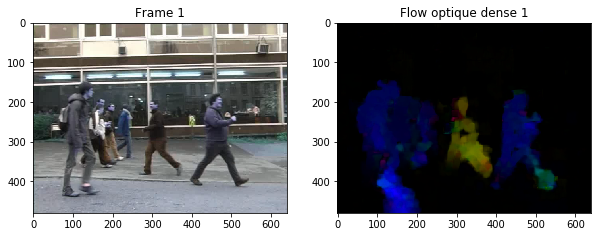

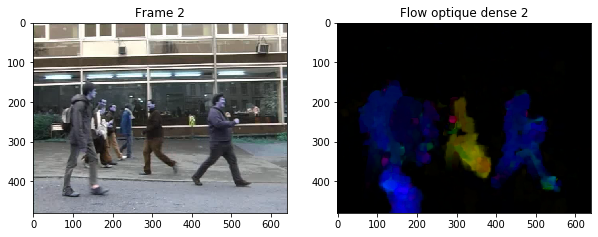

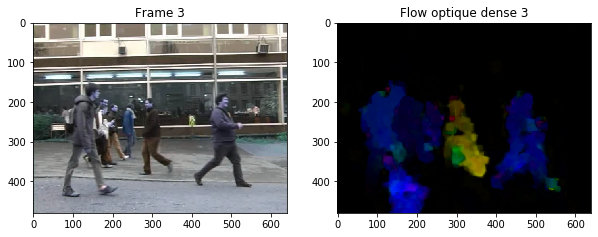

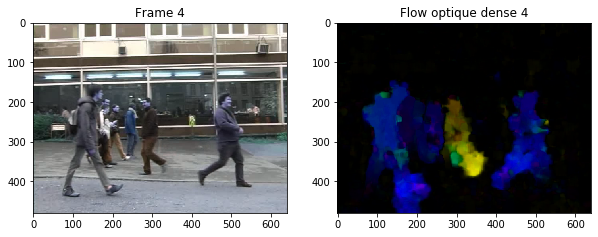

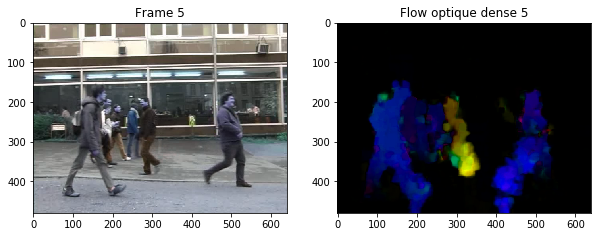

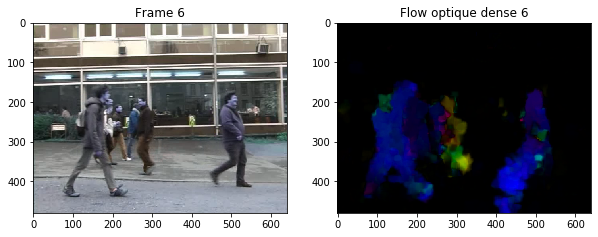

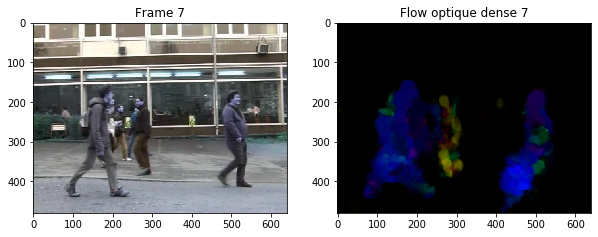

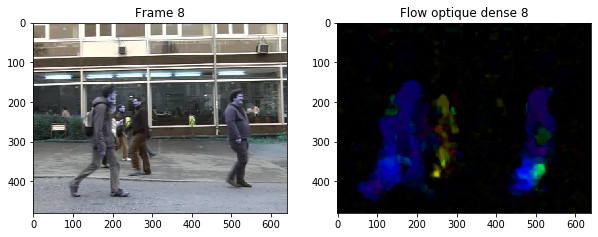

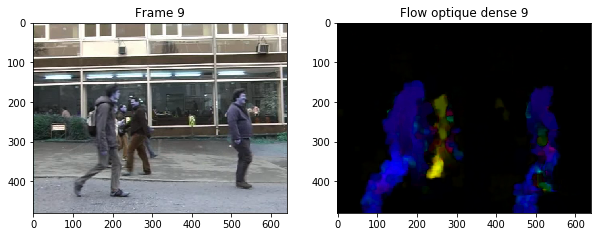

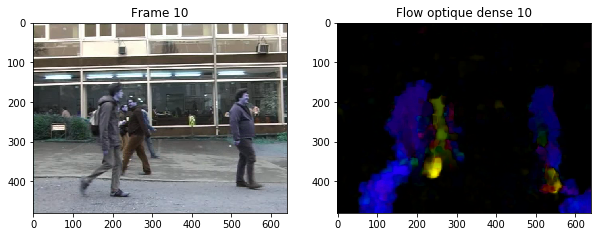

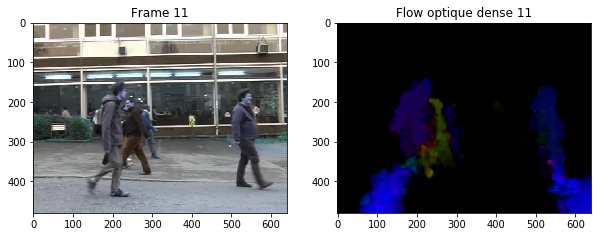

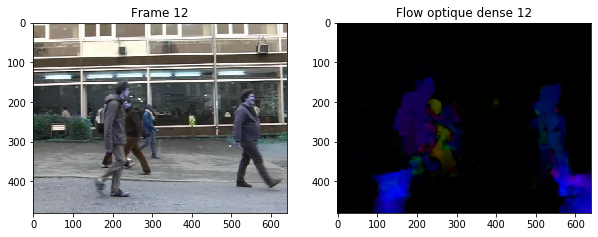

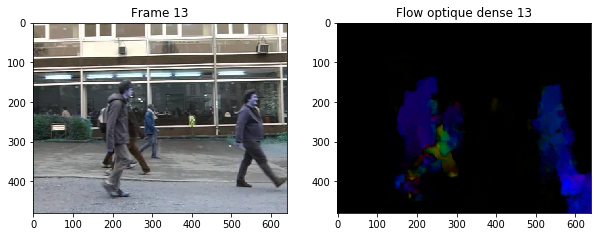

In [12]:
#pour chaque frame, appliqué le calcul de flow
i=1
while(1):
    ret, frame2 = cap.read()
    if ret==False: #s'il n'y aplus de frame, si la vidéo est a la fin, sortir de la boucle
        break
    next = cv.cvtColor(frame2,cv.COLOR_BGR2GRAY)
    
   
    #on calcul le flow à partir du frame précedant 
    flow = cv.calcOpticalFlowFarneback(prvs,next, None, 0.5, 3, 10, 3,5, 0.5,0)
    
    #Recupération du vecteur de flow optique dense (l'angele et la magnetitude) avec la fonction cartToPolar()  d'OpenCV
    mag, ang = cv.cartToPolar(flow[...,0], flow[...,1])
    
    hsv[...,0] = ang*180/np.pi/2
    hsv[...,2] = cv.normalize(mag,None,0,255,cv.NORM_MINMAX)
    
    # Pour avoir les valeurs normalisées en nombre e ntier entre 0 et 255, nous convertissons les pixels de HSV à BGR
    bgr = cv.cvtColor(hsv,cv.COLOR_HSV2BGR)
    # récupréation
    
    numpy_horizontal = np.hstack((frame2, bgr))
    cv.resizeWindow('image', 120,100) 
    cv.imshow('Image et ', numpy_horizontal)
    
    k = cv.waitKey(30) & 0xff

    if k == 27:
        break
    elif k == ord('s'): #nous pouvons sauvegarder le frame courant dans le reppertoir "images" en apuyant sur la lettre "s"
        cv.imwrite('images/'+ str(i)+'frame_courant.png',frame2)
        cv.imwrite('images/'+ str(i)+'flow_optic_correspondant.png',bgr)
    prvs = next
    
    #Visualisation des frames courrant et de son flow optique
    plt.figure(figsize=(10,10))
    plt.subplot(1,2,1)
    plt.imshow(frame2)
    plt.title("Frame " + str(i))
    plt.subplot(1,2,2)
    plt.imshow(bgr)
    plt.title("Flow optique dense "+ str(i))
    plt.show()
    i=i+1
#libération de la mémoire
cap.release()
cv.destroyAllWindows()

#  Flux optique dense dans OpenCV